<div style="border:solid green 2px; padding: 20px">
<b>Привет, Антон!</b>

Меня зовут Александр Пономаренко, и я буду проверять твой проект. Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать data science. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их**. Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самой найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше. Но настаивать на их отработке не буду.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом.** Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Сборный проект 2

## Описание проекта

Данные находятся в трёх файлах:

* gold_recovery_train_new.csv — обучающая выборка;

* gold_recovery_test_new.csv — тестовая выборка;

* gold_recovery_full_new.csv — исходные данные.

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.

Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.

В вашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверьте по нашей инструкции их на корректность.

## Подключение библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

## Шаг 1. Подготовка данных

Открытие gold_recovery_train_new и получение информации о нём

In [2]:
try:
    df_train = pd.read_csv('gold_recovery_train_new.csv')
except FileNotFoundError:
    df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    
df_train.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


Открытие gold_recovery_test_new и получение информации о нём

In [4]:
try:
    df_test = pd.read_csv('gold_recovery_test_new.csv')
except FileNotFoundError:
    df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    
df_test.head(10)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

Открытие gold_recovery_full_new и получение информации о нём

In [6]:
try:
    df_full = pd.read_csv('gold_recovery_full_new.csv')
except FileNotFoundError:
    df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
    
df_full.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [7]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Итак после изучении информации о датасете, мы видим, что в каждом из них присутствуют пропуски. Разберемся с ними чуть позже. Сначала напишем функцию для расчёта recovery и проверим правильно ли она рассчитана

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> отлично, данные на месте:)</div>

### Шаг 1.2.  Проверка эффективности обогащения

In [8]:
def recovery(C, F, T):
    return C * (F - T) / (F * (C - T)) * 100

In [9]:
rougher_recovery = []

for i in df_train.index:
    rougher_recovery.append(recovery(df_train.iloc[i]['rougher.output.concentrate_au'],
                                     df_train.iloc[i]['rougher.input.feed_au'],
                                     df_train.iloc[i]['rougher.output.tail_au']
                                    ))
rougher_recovery = pd.Series(rougher_recovery, index=range(len(rougher_recovery)))
rougher_recovery.head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
dtype: float64

In [10]:
print(mean_absolute_error(df_train['rougher.output.recovery'], rougher_recovery))

9.73512347450521e-15


<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Да, все хорошо, только по заданию просят посчитать MAE, а не MSE;) </div>

<div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b> Да, теперь все верно:)</div>

Эффективности обогащения рассчитана правильно

### Шаг 1.3. Анализ признаков, недоступных в тестовой выборке.

Выведем признаки, которых нет в тестовой выборке

In [11]:
for i in df_full.columns:
    if i not in df_test:
        print(i)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

Как мы видим все признаки имеют ключевое слово output. Не сложно догадаться что наша модель должна предсказывать 2 ключевых параметра, без данных о том сколько веществ мы получили после этапов на выходе.

### Шаг 1.4. Предобработка данных

Теперь пора заняться пропусками. Так как мы не можем узнать причину потери данных и не можем спросить у сотрудников этого предприятия, но так как "Соседние по времени параметры часто похожи", поэтому пропуски можно предыдущими значениями.

In [12]:
data_train = df_train.fillna(method='ffill')
data_test = df_test.fillna(method='ffill')
data_full = df_full.fillna(method='ffill')
print(data_train.isna().sum().sum())
print(data_test.isna().sum().sum())
print(data_full.isna().sum().sum())

0
0
0


<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b>
    
    
Все же пропусков многовато, в задании сказано, что `Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи`, поэтому пропуски можно предыдущими значениями.


P.S метод `method='ffill'`
</div>

Да это больно. 23% данных из обучающих данных пришлось убрать, но надо вовсем искать плюсы в тестовой всего < 2% данных с пропусками. После всех этих шагов мы можем приступить к анализу данных (НЕ АКТУАЛЬНО). Ура без потерь данных.

<div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b> Да, так гораздо лучше:)</div>

## Шаг 2. Анализ данных

### Шаг 2.1. Изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки

Для того чтобы лучше рассмотреть изменение концентрации металлов на различных этапов очистки. Построим 3 гистограммы, которые будут в себя включать ещё 3 гистограммы, для каждого из металлов

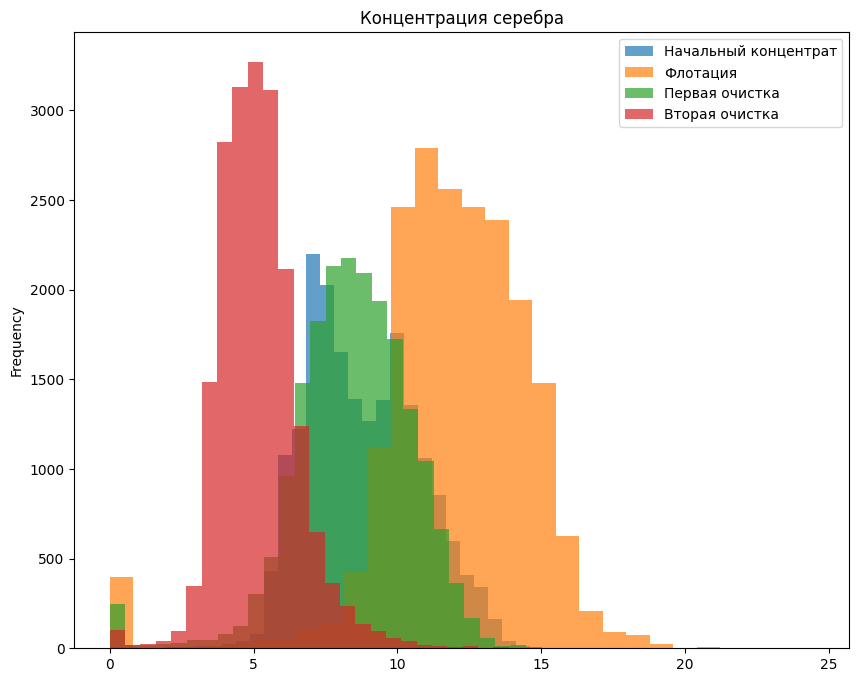

In [13]:
data_full.loc[:, 'rougher.input.feed_ag'].plot(kind='hist', figsize=(10, 8), bins=30, alpha=0.7, legend=True)
data_full.loc[:, 'rougher.output.concentrate_ag'].plot(kind='hist', figsize=(10, 8), bins=30, alpha=0.7, legend=True)
data_full.loc[:,'primary_cleaner.output.concentrate_ag'].plot(kind='hist', figsize=(10, 8), bins=30, alpha=0.7, legend=True)
data_full.loc[:,'final.output.concentrate_ag'].plot(kind='hist', figsize=(10, 8), bins=30, alpha=0.7, legend=True)
plt.legend(['Начальный концентрат', 'Флотация', 'Первая очистка', 'Вторая очистка'])
plt.title('Концентрация серебра');

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b>
    
    
Да, огонь, только один этап пропущен: `rougher.input.feed_`, подправь, пожалуйста, для всех металлов)
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b> Теперь все этапы на месте:)</div>

Как мы видим с каждом этапом концентрат серебра уменьшаеться.

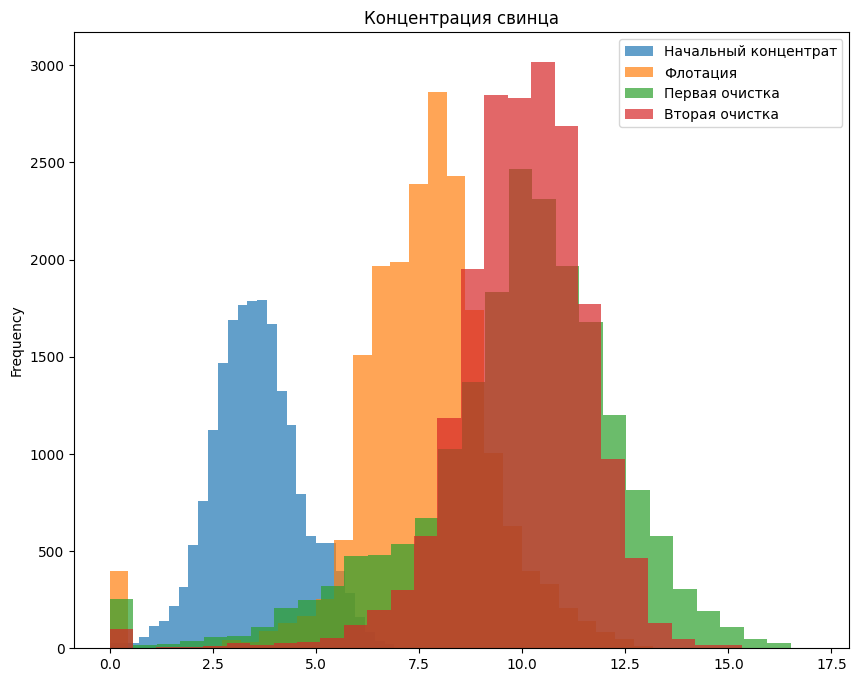

In [14]:
data_full.loc[:, 'rougher.input.feed_pb'].plot(kind='hist', figsize=(10, 8), bins=30, alpha=0.7, legend=True)
data_full.loc[:, 'rougher.output.concentrate_pb'].plot(kind='hist', figsize=(10, 8), bins=30, alpha=0.7, legend=True)
data_full.loc[:,'primary_cleaner.output.concentrate_pb'].plot(kind='hist', figsize=(10, 8), bins=30, alpha=0.7, legend=True)
data_full.loc[:,'final.output.concentrate_pb'].plot(kind='hist', figsize=(10, 8), bins=30, alpha=0.7, legend=True)
plt.legend(['Начальный концентрат', 'Флотация', 'Первая очистка', 'Вторая очистка'])
plt.title('Концентрация свинца');

Со свинцом тут не простая ситуация. Меньше всего концентрата свинца после флотации. После первой очистки концентрат увеличивается, а после 2 он несильно увеличивается, скорее даже стремиться к 10

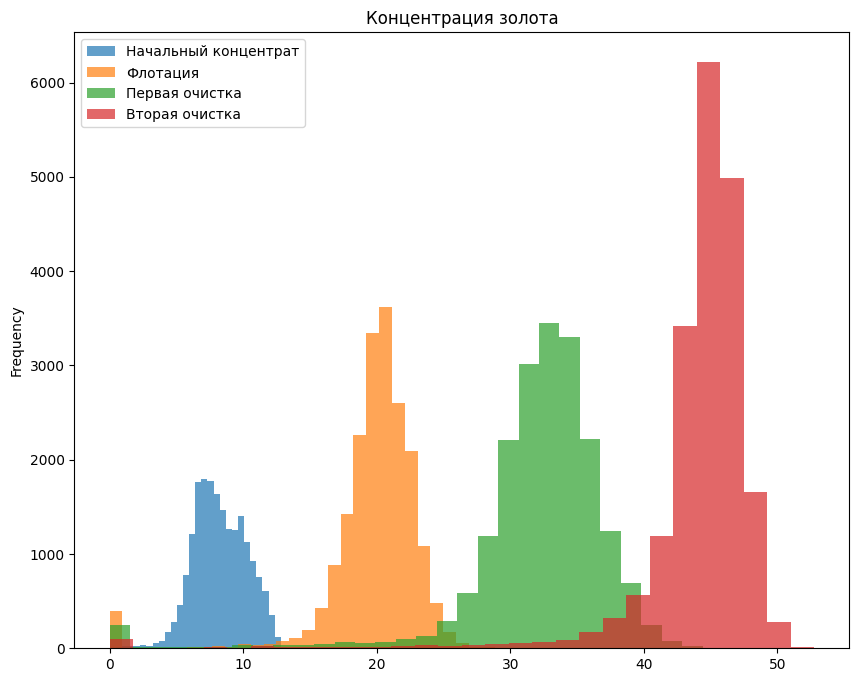

In [15]:
data_full.loc[:, 'rougher.input.feed_au'].plot(kind='hist', figsize=(10, 8), bins=30, alpha=0.7, legend=True)
data_full.loc[:, 'rougher.output.concentrate_au'].plot(kind='hist', figsize=(10, 8), bins=30, alpha=0.7, legend=True)
data_full.loc[:,'primary_cleaner.output.concentrate_au'].plot(kind='hist', figsize=(10, 8), bins=30, alpha=0.7, legend=True)
data_full.loc[:,'final.output.concentrate_au'].plot(kind='hist', figsize=(10, 8), bins=30, alpha=0.7, legend=True)
plt.legend(['Начальный концентрат', 'Флотация', 'Первая очистка', 'Вторая очистка'])
plt.title('Концентрация золота');

Ну с золотом всё простои можно описать одним предложением. Для этого и был придуман этот процесс, чтобы увеличить концентрат золота

И так по этим гистограммам мы можем сказать, что концентрат серебра уменьшается и отпадает после 3 этапов. А вот концентрат свинеца и золота наоборот растёт, при чём у золота очень сильно

### Шаг 2.2. Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

Для сравнения мы всё также будем использовать гистограммы. Чтобы понять по ним будет ли распределения размеров гранул сырья похожие нам нужно будет сравнить симметричность графиков

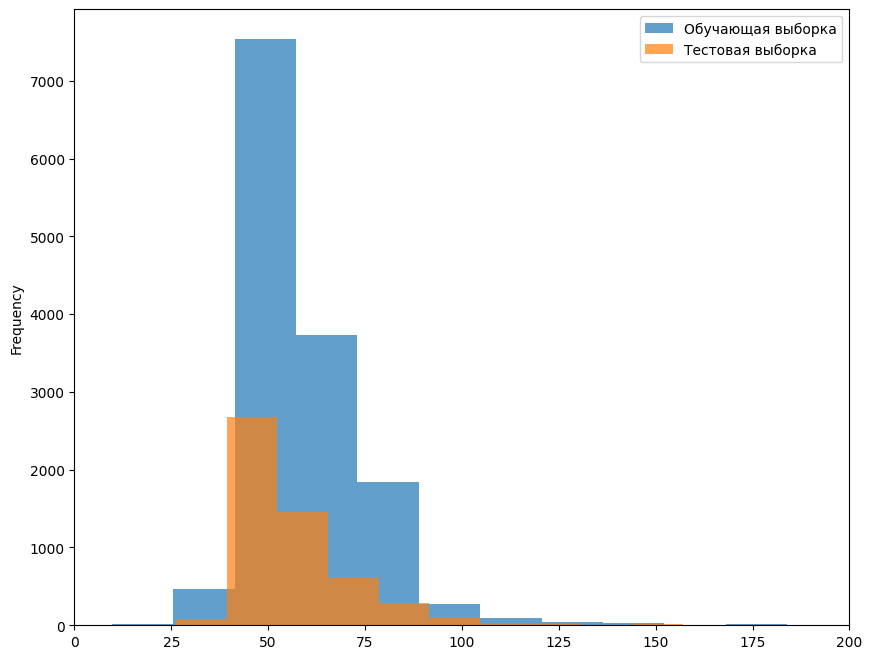

In [16]:
data_train.loc[:, 'rougher.input.feed_size'].plot(kind='hist', figsize=(10, 8), bins=30, alpha=0.7, legend=True)
data_test.loc[:,'rougher.input.feed_size'].plot(kind='hist', figsize=(10, 8), bins=30, alpha=0.7, legend=True)
plt.legend(['Обучающая выборка', 'Тестовая выборка'])
plt.xlim(0, 200);

Гистограммы симметричны. Значит распределения одинаковы.

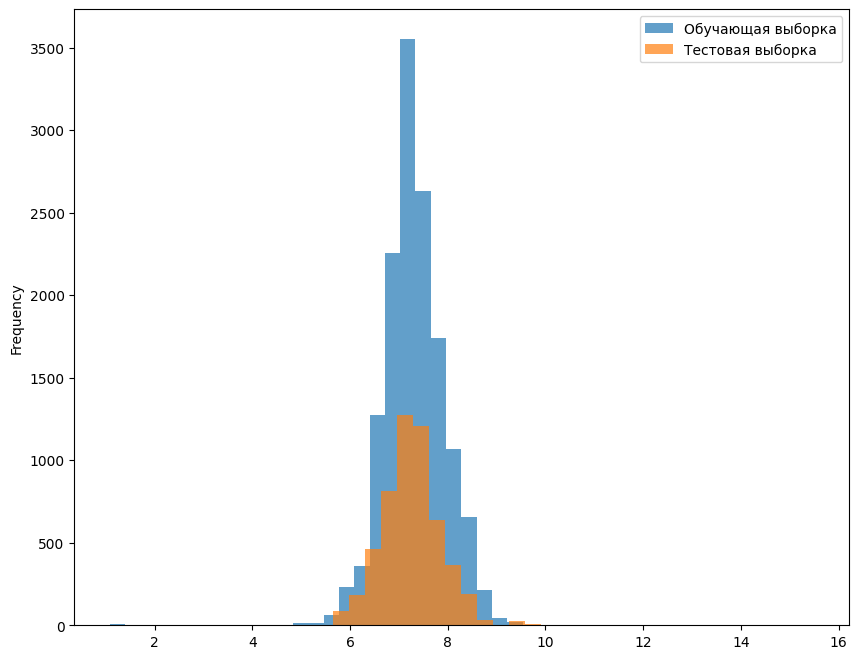

In [17]:
data_train.loc[:, 'primary_cleaner.input.feed_size'].plot(kind='hist', figsize=(10, 8), bins=30, alpha=0.7, legend=True)
data_test.loc[:,'primary_cleaner.input.feed_size'].plot(kind='hist', figsize=(10, 8), bins=30, alpha=0.7, legend=True)
plt.legend(['Обучающая выборка', 'Тестовая выборка']);

Тут аналогичная ситуация. Распределения одинаковы.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> отлично, тут все верно:)</div>

### Шаг 2.3. Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

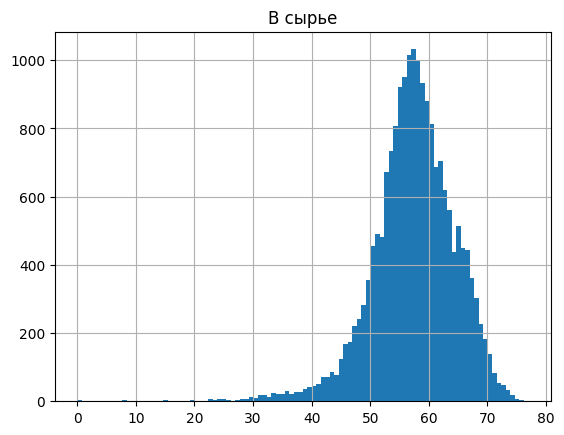

In [18]:
(data_full['rougher.input.feed_au'] + data_full['rougher.input.feed_ag'] +
data_full['rougher.input.feed_pb'] + data_full['rougher.input.feed_sol']).hist(bins=100)
plt.title('В сырье');

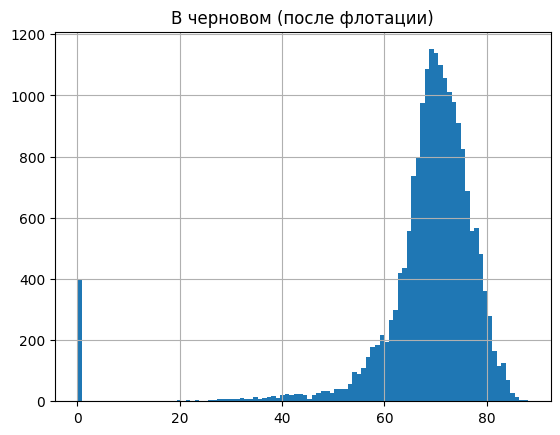

In [19]:
(data_full['rougher.output.concentrate_au'] + data_full['rougher.output.concentrate_ag'] +
data_full['rougher.output.concentrate_pb'] + data_full['rougher.output.concentrate_sol']).hist(bins=100)
plt.title('В черновом (после флотации)');

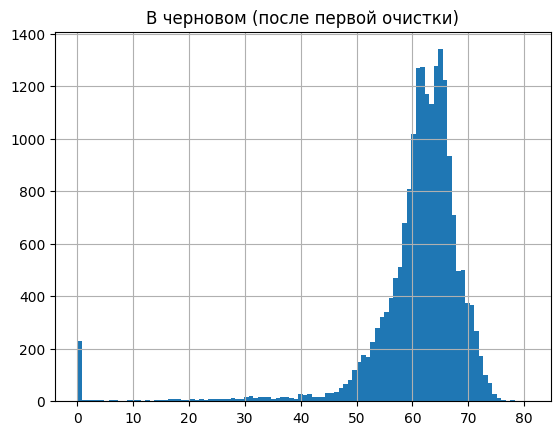

In [20]:
(data_full['primary_cleaner.output.concentrate_au'] + data_full['primary_cleaner.output.concentrate_ag'] +
data_full['primary_cleaner.output.concentrate_pb'] + data_full['primary_cleaner.output.concentrate_sol']).hist(bins=100)
plt.title('В черновом (после первой очистки)');

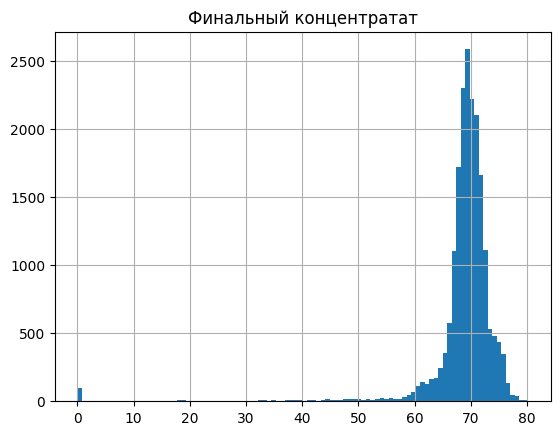

In [21]:
(data_full['final.output.concentrate_au'] + data_full['final.output.concentrate_ag'] +
data_full['final.output.concentrate_pb'] + data_full['final.output.concentrate_sol']).hist(bins=100)
plt.title('Финальный концентратат');

По 4 гистограммам можно увидеть, что после каждого этапа суммарный концентрат увеличивается. Распределение на каждом из графиков нормальное. После каждого этапа центр гистограмм смещается правее

<div class="alert alert-info"> <b>Комментарий студента:</b> Вопрос по-поводу аномальных значений. По графикам выше видно, что есть аномальные значения которые равны 0. Но стоит ли их уберать? Или просто отрезать по 1 квантилю с каждой стороны. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера V2⚠️:</b> Думаю если уберешь 1 квантиль, то ничего страшного (главное чтобы много данных не удалил), иначе можешь значения, которые возле нуля

</div>


In [22]:
data_train_f = data_train.drop('date', axis=1)
name = ['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb',
        'rougher.input.feed_sol', 'rougher.output.concentrate_au', 'rougher.output.concentrate_ag',
        'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'primary_cleaner.output.concentrate_au',
        'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol',
        'final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol']

for i in name:
    data_train_f = data_train_f[1 < data_train_f[i]]

data_train_f.shape[0] / data_train.shape[0]

0.9402784649091809

Аномальные значения отброшены, можно переходить к обучению

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b>
    
+  Нет исследования распределений суммарных концентраций
+  Аномальные значения не отброшены
</div>

## Шаг 3. Построение модели

### Шаг 3.1. Функция sMAPE

Сначала напишем 2 функции sMAPE и final_sMAPE, чтобы оценить наши модели и выбрать лучшую 

In [23]:
def sMAPE(target, predict):
    return 1/ len(target) * np.sum (2 * np.abs(predict - target) / (np.abs(target) + np.abs(predict)) *100)

#def final_sMAPE(target_rougher, predict_rougher, target_final, predict_final):
#    return 0.25 * sMAPE(target_rougher, predict_rougher) + 0.75 * sMAPE(target_final, predict_final)

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошо</div>

### Шаг 3.2. Обучение модели и оценка из кросс-валидацией

Сначала выделим целевые признаки(rougher.output.recovery, final.output.recovery) и параметры.

In [24]:
#target_rougher = data_train_f['rougher.output.recovery']
#target_final = data_train_f['final.output.recovery']
#features_rougher = data_train_f[data_test.columns[1:]]

Перейдём к обучению моделей. Сначала обучим модель дерево решений

In [26]:
#%%time

#params = {'max_depth': [int(x) for x in np.linspace(start = 1, stop = 30, num = 10)],
#          'min_samples_leaf': [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)],
#          'min_samples_split': [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)],
#          'max_features': ['log2', 'sqrt']
#             }

#my_func = make_scorer(sMAPE, greater_is_better=False)

#grid_tree = GridSearchCV(estimator=DecisionTreeRegressor(random_state=12345),
#                         param_grid=params,
#                         scoring=my_func,
#                         cv=5,
#                         n_jobs=-1)#

#grid_tree.fit(features_rougher_scaled, target_rougher)
#

#print(grid_tree.cv_results_)
        

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b>Это все конечно хорошо, но давай переходить на автоматизацию (GridSearchCV)
    
    
+  https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee
+  https://jeffspagnola.medium.com/the-basics-of-gridsearch-e9cc9da7578f
+  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    
    
Постарайся сначала сам разобраться, если не получится, то в следующий раз обязательно помогу и расскажу:)
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Я попытался разобраться, но что-то не пошло. 1) Сложности с функцией: когда я вывожу лучшую оценку, для лучших параметров у меня выводит -11... , но такого впринципе не может быть так как моя функция выодит значения только > 0. 2) Так как наша финальная оценка состоит из 2 одновременно предсказанных целевых признаков вопрос - как сделать оценку? У меня былиа 1 идея: использовать кросс-валидацию и с помощь этого в 2 переменные сохранить список с оценками и список со словарями из гиперпараметров параметров, потом переобучить кросс-валидацию для нахождения второго целевого признака и сохранить её оценки, потом просуммировать оценки и найти лучшую. Вопрос - как это оптимизировать(ну или хотя бы как сохранить те 2 переменных, которые я описал выше).   </div>

<div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b> 

1.  Все верно заметил, действительно `sMAPE > 0`, но смотри: `GridSearchCV` по умолчанию максимизирует метрику (ищет наибольшую), а нам нужно, наоборот, минимизировать. Поэтому мы и используем `greater_is_better=False` это дает отрицательную метрику( условно мы вместо 2,5,10 получаем -2,-5,-10. В первом случае алгоритм бы выдал 10, а во втором -2, то что нам и нужно). А минус просто остается, как побочный продукт, можно просто взять по модулю метрику. Надеюсь не запутал)
    
2.  смотри:

</div>

In [27]:
#%%time
#КОД РЕВЬЮЕРА
#def get_smape(target, predict):
#    return 1/ len(target) * np.sum (2 * np.abs(predict - target) / (np.abs(target) + np.abs(predict)) *100)

#def get_final_smape(y_true, y_pred):
#    y_pred = np.transpose(y_pred)
#    rougher = get_smape(y_true['rougher.output.recovery'], y_pred[0])
#    final = get_smape(y_true['final.output.recovery'], y_pred[1])
    
#    return 0.25 * rougher + 0.75 * final

#custom_score = make_scorer(get_final_smape, greater_is_better=False)

#features_data_train = data_train.drop(['rougher.output.recovery','final.output.recovery', 'date'], axis=1)
#target_data_train = data_train[['rougher.output.recovery', 'final.output.recovery']]

#params = {'max_depth': [int(x) for x in np.linspace(start = 1, stop = 20, num = 2)],
#          'min_samples_leaf': [int(x) for x in np.linspace(start = 2, stop = 20, num = 2)],
#          'min_samples_split': [int(x) for x in np.linspace(start = 2, stop = 20, num = 2)],
#          'max_features': ['log2', 'sqrt']
#             }

#my_func = make_scorer(sMAPE, greater_is_better=False)

#grid_tree = GridSearchCV(estimator=DecisionTreeRegressor(random_state=12345),
#                         param_grid=params,
#                         scoring=custom_score,
#                         cv=5,
#                         n_jobs=-1)

#grid_tree.fit(features_data_train, target_data_train)


#print('Best sMAPE: ', abs(grid_tree.best_score_))

In [31]:
def final_smape(y_true, y_pred):
    y_pred = np.transpose(y_pred)
    rougher = sMAPE(y_true['rougher.output.recovery'], y_pred[0])
    final = sMAPE(y_true['final.output.recovery'], y_pred[1])
    
    return 0.25 * rougher + 0.75 * final

features_data_train = data_train_f[data_test.columns[1:]]
target_data_train = data_train_f[['rougher.output.recovery', 'final.output.recovery']]


In [32]:
%%time

params = {'max_depth': [int(x) for x in np.linspace(start = 1, stop = 50, num = 10)],
          'min_samples_leaf': [int(x) for x in np.linspace(start = 2, stop = 30, num = 5)],
          'min_samples_split': [int(x) for x in np.linspace(start = 2, stop = 30, num = 5)],
          'max_features': ['log2', 'sqrt']
             }

custom_score = make_scorer(final_smape, greater_is_better=False)


grid_tree = GridSearchCV(estimator=DecisionTreeRegressor(random_state=12345),
                         param_grid=params,
                         scoring=custom_score,
                         cv=5,
                         n_jobs=-1)

grid_tree.fit(features_data_train, target_data_train)


print('Best sMAPE: ', abs(grid_tree.best_score_))

best_model_tree = grid_tree.best_estimator_

print(best_model_tree)


Best sMAPE:  9.21504968156799
DecisionTreeRegressor(max_depth=6, max_features='log2', min_samples_leaf=23,
                      random_state=12345)
CPU times: total: 8.34 s
Wall time: 1min 3s


In [33]:
%%time

params = {'max_depth': [int(x) for x in np.linspace(start = 1, stop = 20, num = 4)],
          'min_samples_leaf': [int(x) for x in np.linspace(start = 2, stop = 30, num = 3)],
          'min_samples_split': [int(x) for x in np.linspace(start = 2, stop = 30, num = 3)],
          'max_features': ['log2', 'sqrt'],
          'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 70, num = 7)],
             }


grid_forest = GridSearchCV(estimator=RandomForestRegressor(random_state=12345),
                         param_grid=params,
                         scoring=custom_score,
                         cv=5,
                         n_jobs=-1)

grid_forest.fit(features_data_train, target_data_train)


print('Best sMAPE: ', abs(grid_forest.best_score_))

best_model_forest = grid_forest.best_estimator_

print(best_model_forest)


Best sMAPE:  8.027889015620264
RandomForestRegressor(max_depth=7, max_features='log2', min_samples_leaf=30,
                      n_estimators=60, random_state=12345)


In [34]:
params = {
    'fit_intercept':[True, False],
    'normalize':[True, False]
}

grid_linear = GridSearchCV(estimator=LinearRegression(),
                         param_grid=params,
                         scoring=custom_score,
                         cv=5,
                         n_jobs=-1)

grid_linear.fit(features_data_train, target_data_train)


print('Best sMAPE: ', abs(grid_linear.best_score_))

best_model_linear = grid_linear.best_estimator_

print(best_model_linear)


Best sMAPE:  9.827867845267344
LinearRegression(normalize=False)


C:\anac\envs\practicum\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


Лучшей моделью оказалась модель случайного леса, проверем модель на тестовой выборке

Для начала возьмем из полного датасета целевые признаки, чтобы вычислить sMAPE модели. Будем искать данные в df_full(датасет с пропусками).

In [35]:
#target_full_test = []
#target_rougher_test = []

#for i in df_full.index:
#    if df_full['date'][i] in list(data_test['date']):
#        target_rougher_test.append(df_full['rougher.output.recovery'][i])
#        target_full_test.append(df_full['final.output.recovery'][i])
#        
#target_full_test = pd.Series(target_full_test, index=range(len(data_test.index)))
#target_rougher_test = pd.Series(target_rougher_test, index=range(len(data_test.index)))

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Давай постараемся  получить таргет используя merge по дате (ну то есть соединить full и тест по дате, но при этом из full взять только два столбца, которые нам нужны)

</div>

In [36]:
data_test_merge = data_test.merge(data_full, how='left', left_on='date', right_on='date')

target_test = data_test_merge[['final.output.recovery', 'rougher.output.recovery']]

target_test.head()

,final.output.recovery,rougher.output.recovery
0,70.273583,89.993421
1,68.910432,88.089657
2,68.143213,88.412756
3,67.776393,87.360133
4,61.467078,83.236367


Из тестового датесета уберем столбец с датами и промаштабируем результат.

In [38]:
features_data_train.shape

(13304, 52)

In [39]:
features_test_scaled.shape

(5290, 52)

Проверим датасет на тестовой выборке

In [41]:
best_model_forest.fit(features_data_train, target_data_train)

predictions = best_model_forest.predict(data_test.drop('date', axis=1))

score = final_smape(target_test, predictions)

print(score)

8.898006790164391


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>Протестировал коректно </div>

## Выводы

1) При анализе датасета мы убедились, что данный технологический процесс действительно работает(после прохождения всех этапов концентрат золота увеличивается)

2) Мы наглядно увидели, что в процессе очистки вещество очищается от соли и серебра.

3) При оценки модели мы использовали метрику sMAPE, потому что она более точно даёт оценку для этих параметров.

4) Мы обучили модель и проверели её на тестовом датасете. Мы получили не плохие результаты

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>
<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>Антон,  получился хороший проект! 
    
Если есть какие либо вопросы я с удовольствием на них отвечу:) <br> Исправь, пожалуйста, замечания и жду проект на следующую проверку:) </div>
